## Homework 5 - The eternal significance of publications and citations!
#### Group 18: Yousef Kanj (2113258), Simone Zagaria (2145389), Matteo Pazzini (1868953), Sai Swaroop Chittoor (1916247) 

_____

In [2]:
import ijson
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
import re
import networkx as nx
from prettytable import PrettyTable 
import matplotlib.pyplot as plt


For each 150000 lines read from the JSON, we converted them to a pandas dataframe, sorted the dataframe for the top 10k by n_citations, dropped the rest of the entries, saved as a csv file and reset variables to clear memory. Between the 4.8 million entries processed, around 20 gave an error while reading them this was managed with a try except statement considering they're a negligible amount.

In [5]:
papers = []
x=0
maxed = 0
with open('dblp.v12.json', "rb") as file: 
    for i, element in tqdm(enumerate(ijson.items(file, "item"))):
        try:
            paper = {}

            paper['id'] = element['id']

            paper['title'] = element['title']

            paper['authors'] = element['authors']

            paper['year'] = element.get('year', np.nan)

            paper['n_citation'] = int(element.get('n_citation', None)) 
            
            paper['doc_type'] = element.get('doc_type', np.nan)

            paper['references'] = element.get('references', np.nan)

            paper['doi'] = f"https://doi.org/{element['doi']}" if 'doi' in element else np.nan

            paper['indexed_abstract'] = element.get('indexed_abstract', np.nan)

            paper['fos'] = element.get('fos', np.nan)

            paper['venue'] = element.get('venue', np.nan)

            papers.append(paper)

            if int(element.get('n_citation', None)) > maxed:
                maxed = int(element.get('n_citation', None))
                print(maxed)

        except Exception as error:
            print(i, error)

        if i % 150000 == 0 and i != 0:
            x+=1
            df = pd.DataFrame(papers)
            df = df.sort_values(by="n_citation", ascending= False)
            df = df[:10000]
            path = r"DFs\chunk " + str(x) + ".csv"
            df.to_csv(path)
            papers = []

path = r"DFs\chunk.csv"
df = pd.DataFrame(papers)
df = df.sort_values(by="n_citation", ascending= False)
df = df[:10000]
df.to_csv(path)
df.head(10)

2428it [00:00, 12133.94it/s]

1
6
13
66
113
129
215
1709


26848it [00:01, 13686.54it/s]

3450


283848it [00:36, 5357.14it/s] 

4638


349366it [00:48, 10494.30it/s]

13365


598008it [01:32, 9536.85it/s] 

14257


664361it [01:48, 9219.95it/s]

14972


689022it [01:54, 1031.55it/s]

25855


1132865it [03:22, 9378.31it/s]

32053


2938613it [09:58, 8383.62it/s]

35541


4073542it [14:10, 8870.38it/s] 

4072519 'authors'
4073609 'authors'
4074066 'authors'


4076205it [14:10, 8529.68it/s]

4075098 'authors'
4075506 'authors'
4075960 'authors'
4075982 'authors'
4076003 'authors'
4076007 'authors'
4076545 'authors'
4076556 'authors'


4078839it [14:11, 8225.61it/s]

4077547 'authors'
4078600 'authors'
4079011 'authors'


4080477it [14:11, 7956.90it/s]

4079482 'authors'
4079499 'authors'


4084023it [14:11, 8693.09it/s]

4082186 'authors'
4082218 'authors'


4093646it [14:12, 10276.93it/s]

42437


4632501it [15:54, 9553.97it/s] 

44175


4698039it [16:09, 6993.93it/s] 

48327


4894081it [16:50, 4842.29it/s] 


,id,title,authors,year,n_citation,doc_type,references,doi,indexed_abstract,fos,venue
74650,301824129,"Introduction to Algorithms, Second Edition","[{'name': 'TH Cormen', 'id': 40955404}, {'name...",2001,5155,Book,NaN,https://doi.org/,NaN,"[{'name': 'Computer science', 'w': 0.47071}, {...",NaN
30744,2611515161,Distributed Algorithms,"[{'name': 'Nancy A. Lynch', 'id': 2180706138}]",1996,3920,Book,"[138290785, 581672660, 1498909462, 1507757695,...",https://doi.org/,"{'IndexLength': 341, 'InvertedIndex': {'design...","[{'name': 'Consensus', 'w': 0.57338}, {'name':...",NaN
30600,2611243847,Planning Algorithms,"[{'name': 'Steven M. LaValle', 'id': 399368623}]",2006,3630,Book,"[1527367709, 2022344379, 2121859020, 214483615...",https://doi.org/,NaN,"[{'name': 'Kinodynamic planning', 'w': 0.58379...",NaN
41316,2751199251,Fundamentals of Database Systems,"[{'name': 'Ramez A. Elmasri', 'org': 'Univ. of...",1989,3194,Book,NaN,https://doi.org/,"{'IndexLength': 209, 'InvertedIndex': {'modeli...","[{'name': 'Data science', 'w': 0.46606}, {'nam...",NaN
86509,6908809,ADADELTA: An Adaptive Learning Rate Method,"[{'name': 'Matthew D. Zeiler', 'id': 2087742686}]",2012,2376,Repository,"[1994616650, 2147768505, 2168231600, 2950351588]",https://doi.org/,"{'IndexLength': 92, 'InvertedIndex': {'voice':...","[{'name': 'Online machine learning', 'w': 0.63...","{'raw': 'arXiv: Learning', 'id': 2597173376, '..."
30770,2611598995,The C Programming Language,"[{'name': 'Brian W. Kernighan', 'org': 'AT & T...",1978,2247,Book,[2162178863],https://doi.org/,"{'IndexLength': 134, 'InvertedIndex': {'been':...",[{'name': 'Fifth-generation programming langua...,NaN
31127,2612445135,MobileNets: Efficient Convolutional Neural Net...,"[{'name': 'Andrew G. Howard', 'id': 2612173839...",2017,2196,Repository,"[1650736245, 1686810756, 1821462560, 190531205...",https://doi.org/,"{'IndexLength': 118, 'InvertedIndex': {'called...","[{'name': 'Object detection', 'w': 0.53801}, {...",{'raw': 'arXiv: Computer Vision and Pattern Re...
30866,2611894836,Ontology Matching,"[{'name': 'Jérôme Euzenat', 'id': 1501542852},...",2007,2066,Book,NaN,https://doi.org/,"{'IndexLength': 317, 'InvertedIndex': {'been':...","[{'name': 'Ontology (information science)', 'w...",NaN
38764,2739999456,UniProt: A hub for protein information,"[{'name': 'A Bateman', 'id': 2120643991}, {'na...",2015,2003,,"[2076048958, 2107644675, 2107785922, 210872349...",https://doi.org/,"{'IndexLength': 166, 'InvertedIndex': {'been':...","[{'name': 'World Wide Web', 'w': 0.38444}, {'n...","{'raw': 'Nucleic Acids Research , 43 (D1) D..."
32072,2615953416,Stochastic Simulation,"[{'name': 'Brian D. Ripley', 'org': 'Universit...",1987,1721,Book,"[1967986582, 1975850564, 1980005324, 198802234...",https://doi.org/,NaN,"[{'name': 'Stochastic simulation', 'w': 0.6382...",NaN


These 33 folders of the top 10k per chunk were then concatenated together, sorted again for the top 10k between all, and the rest was dropped. From there we needed to proceed with data cleaning and correcting the data types.

In [6]:
folder_path = r'C:\Users\youse\Desktop\GitHub\ADM-HW-5\DFs' 

dataframes = []

for i in tqdm(range(33)):  
    file_name = f"chunk {i}.csv"  if i > 0 else "chunk.csv"
    file_path = os.path.join(folder_path, file_name)

    df = pd.read_csv(file_path)
    dataframes.append(df)

concatenated_df = pd.concat(dataframes, ignore_index=True)
concatenated_df.shape

100%|██████████| 33/33 [00:11<00:00,  2.86it/s]


(330000, 12)

In [10]:
def authors_to_dict(input_string): # This function converts the authors column to a clean dictionary with ID as key and name as value
    pattern = r"'name':\s*'([^']+)'.*?'id':\s*(\d+)(?:,.*?|})"
    matches = re.findall(pattern, input_string)

    result_dict = {int(id_): name for name, id_ in matches}

    return result_dict
concatenated_df = concatenated_df.sort_values(by="n_citation", ascending= False, ignore_index= True)
concatenated_df = concatenated_df[:10000]
concatenated_df = concatenated_df.drop(["Unnamed: 0", "doc_type", "doi", "venue","fos","indexed_abstract"], axis = 1)
concatenated_df["authors"] = concatenated_df["authors"].apply(authors_to_dict)
concatenated_df["references"] = concatenated_df["references"].apply(lambda x: list(map(int, x.strip("[]").split(", "))) if type(x) != float else x)

In [88]:
concatenated_df[700:750].head(50)


,id,title,authors,year,n_citation,references
700,1779735989,Hypertext Transfer Protocol -- HTTP/1.1,"{2115386452: 'R. Fielding', 2031963039: 'J. Ge...",1997,3088,NaN
701,2041248965,A high-throughput path metric for multi-hop wi...,"{2068353407: 'Douglas S. J. De Couto', 2150144...",2003,3085,"[1576234698, 1778653021, 1782536560, 197806845..."
702,1966553486,Using collaborative filtering to weave an info...,"{2618025618: 'David Goldberg', 2289076120: 'Da...",1992,3085,"[1516049114, 1976379365, 2002110561, 201958012..."
703,2153704625,Dynamo: amazon's highly available key-value store,"{2040272370: 'Giuseppe DeCandia', 323468284: '...",2007,3084,"[182346126, 1497412888, 1600255172, 1602193077..."
704,1904365287,Improving neural networks by preventing co-ada...,"{563069026: 'Geoffrey E. Hinton', 2191276622: ...",2012,3082,"[4919037, 1993882792, 2053229256, 2108598243, ..."
705,2096093282,Prokka: rapid prokaryotic genome annotation,{2045243739: 'Torsten Seemann'},2014,3079,"[1976325156, 1989895641, 2065328929, 212688373..."
706,2161062388,The Universal Protein Resource (UniProt),"{2020717950: 'Amos Bairoch', 332422508: 'Rolf ...",2004,3078,"[1981095206, 2081269341, 2087885007, 210840117..."
707,2138207763,featureCounts: an efficient general purpose pr...,"{2103473315: 'Yang Liao', 1871135775: 'Gordon ...",2014,3073,"[1989367702, 1999574084, 2042160423, 209706594..."
708,2126925200,Digital Game-Based Learning,{221346376: 'Marc Prensky'},2001,3068,NaN
709,2096733369,FaceNet: A unified embedding for face recognit...,"{1966707555: 'Florian Schroff', 2548789676: 'D...",2015,3063,"[170472577, 204612701, 1780066064, 1975517671,..."


In [89]:
concatenated_df[700:750].head(50)


,id,title,authors,year,n_citation,references
700,1779735989,Hypertext Transfer Protocol -- HTTP/1.1,"{2115386452: 'R. Fielding', 2031963039: 'J. Ge...",1997,3088,NaN
701,2041248965,A high-throughput path metric for multi-hop wi...,"{2068353407: 'Douglas S. J. De Couto', 2150144...",2003,3085,"[1576234698, 1778653021, 1782536560, 197806845..."
702,1966553486,Using collaborative filtering to weave an info...,"{2618025618: 'David Goldberg', 2289076120: 'Da...",1992,3085,"[1516049114, 1976379365, 2002110561, 201958012..."
703,2153704625,Dynamo: amazon's highly available key-value store,"{2040272370: 'Giuseppe DeCandia', 323468284: '...",2007,3084,"[182346126, 1497412888, 1600255172, 1602193077..."
704,1904365287,Improving neural networks by preventing co-ada...,"{563069026: 'Geoffrey E. Hinton', 2191276622: ...",2012,3082,"[4919037, 1993882792, 2053229256, 2108598243, ..."
705,2096093282,Prokka: rapid prokaryotic genome annotation,{2045243739: 'Torsten Seemann'},2014,3079,"[1976325156, 1989895641, 2065328929, 212688373..."
706,2161062388,The Universal Protein Resource (UniProt),"{2020717950: 'Amos Bairoch', 332422508: 'Rolf ...",2004,3078,"[1981095206, 2081269341, 2087885007, 210840117..."
707,2138207763,featureCounts: an efficient general purpose pr...,"{2103473315: 'Yang Liao', 1871135775: 'Gordon ...",2014,3073,"[1989367702, 1999574084, 2042160423, 209706594..."
708,2126925200,Digital Game-Based Learning,{221346376: 'Marc Prensky'},2001,3068,NaN
709,2096733369,FaceNet: A unified embedding for face recognit...,"{1966707555: 'Florian Schroff', 2548789676: 'D...",2015,3063,"[170472577, 204612701, 1780066064, 1975517671,..."


In [90]:
concatenated_df[700:750].head(50)


,id,title,authors,year,n_citation,references
700,1779735989,Hypertext Transfer Protocol -- HTTP/1.1,"{2115386452: 'R. Fielding', 2031963039: 'J. Ge...",1997,3088,NaN
701,2041248965,A high-throughput path metric for multi-hop wi...,"{2068353407: 'Douglas S. J. De Couto', 2150144...",2003,3085,"[1576234698, 1778653021, 1782536560, 197806845..."
702,1966553486,Using collaborative filtering to weave an info...,"{2618025618: 'David Goldberg', 2289076120: 'Da...",1992,3085,"[1516049114, 1976379365, 2002110561, 201958012..."
703,2153704625,Dynamo: amazon's highly available key-value store,"{2040272370: 'Giuseppe DeCandia', 323468284: '...",2007,3084,"[182346126, 1497412888, 1600255172, 1602193077..."
704,1904365287,Improving neural networks by preventing co-ada...,"{563069026: 'Geoffrey E. Hinton', 2191276622: ...",2012,3082,"[4919037, 1993882792, 2053229256, 2108598243, ..."
705,2096093282,Prokka: rapid prokaryotic genome annotation,{2045243739: 'Torsten Seemann'},2014,3079,"[1976325156, 1989895641, 2065328929, 212688373..."
706,2161062388,The Universal Protein Resource (UniProt),"{2020717950: 'Amos Bairoch', 332422508: 'Rolf ...",2004,3078,"[1981095206, 2081269341, 2087885007, 210840117..."
707,2138207763,featureCounts: an efficient general purpose pr...,"{2103473315: 'Yang Liao', 1871135775: 'Gordon ...",2014,3073,"[1989367702, 1999574084, 2042160423, 209706594..."
708,2126925200,Digital Game-Based Learning,{221346376: 'Marc Prensky'},2001,3068,NaN
709,2096733369,FaceNet: A unified embedding for face recognit...,"{1966707555: 'Florian Schroff', 2548789676: 'D...",2015,3063,"[170472577, 204612701, 1780066064, 1975517671,..."


In [13]:
def create_citations_graph(dataframe: pd.DataFrame):
    # Creating a graph
    citation_graph = nx.DiGraph()

    # Adding a node to the graph for each paper in the Dataframe in input
    citation_graph.add_nodes_from(dataframe['id'])

    # Adding directed edges based on citation relationships
    for _, row in dataframe.iterrows():
        paper_id = row['id']
        references = row['references']

        # Only add if the list of references has not NaN value
        if references is not np.nan: 
            # Only adding edges if both of the nodes are already in the graph
           # print([ref for ref in references])
            links = [(paper_id, ref) for ref in references if citation_graph.has_node(paper_id) and citation_graph.has_node(ref)]
            #print(links)
            citation_graph.add_edges_from(links)
           # print(citation_graph)
    
    return citation_graph


In [20]:
def create_collaboration_graph(dataframe: pd.DataFrame):
    # Creating a graph
    collaboration_graph = nx.Graph()

    # Iterating through papers in the DataFrame and adding as nodes all the authors for each paper
    for _, row in dataframe.iterrows():
        authors = row['authors']

        # Check if authors is not NaN and is a dictionary
        if authors is not np.nan and isinstance(authors, dict):

            # Adding the author to the graph if there's only a single author without collaborators
            if len(authors) == 1:
                author = list(authors.keys())[0]
                # Adding the author only if they are not already present in the graph
                if not collaboration_graph.has_node(author):
                    collaboration_graph.add_node(author)

            # Adding edges if there are at least two authors
            elif len(authors) > 1:
                author_ids = list(authors.keys())
                # Iterating over all pairs of authors
                for i in range(len(author_ids)):
                    for j in range(i + 1, len(author_ids)):
                        author1 = author_ids[i]
                        author2 = author_ids[j]

                        # Adding the edge or increasing weight of the edge between authors
                        if author1 != author2: 
                            if collaboration_graph.has_edge(author1, author2):
                                # If the edge already exists, increase the weight by 1
                                collaboration_graph[author1][author2]['weight'] += 1
                            else:
                                # If the edge doesn't exist, create a new edge with weight 1. Nodes are automatically added if not already present in the graph
                                collaboration_graph.add_edge(author1, author2, weight=1)

    return collaboration_graph


In [21]:
citation_graph = create_citations_graph(concatenated_df)


In [1]:
collaboration_graph = create_collaboration_graph(concatenated_df)


NameError: name 'create_collaboration_graph' is not defined

In [23]:
print(citation_graph.number_of_nodes())
print(citation_graph.number_of_edges())


10000
52249


In [24]:
print(collaboration_graph.number_of_nodes())
print(collaboration_graph.number_of_edges())


21168
135463


In [78]:
def funct_1(graph,graph_name):

    if graph_name == "Citation Graph":
        
        citation_overview_table = PrettyTable()
        citation_overview_table.add_column("Graph type:", ["Number of Nodes", "Number of Edges", "Density", "Average Degree", "Sparse or Dense"])
        

        ncit_nodes = graph.number_of_nodes() #nodes
        ncit_edges = graph.number_of_edges() #edge
        cit_graph_density = ncit_edges/(ncit_nodes*(ncit_nodes-1))#since the graph is directed we can compute the graph density using this formula

        max_theoretical_edges = int(ncit_nodes*(ncit_nodes-1)) #max edges for an undirected graph, to check if the grapgh is sparse
        nodeinfo = []
        indegreelist = []
        outdegreelist = []
        for node in graph:
            in_degree_node = graph.in_degree(node) 
            out_degree_node = graph.out_degree(node)
            total_degree_node =  graph.degree(node) #in_degree + out_degree
            indegreelist.append(in_degree_node)
            outdegreelist.append(out_degree_node)
            nodeinfo.append(total_degree_node)

        sum_deg = sum(nodeinfo) 
        p = np.percentile(nodeinfo, 95)  # return 95th percentile
        node_hubs = [(node,graph.degree(node)) for node in graph if graph.degree(node) > p]
        node_hubs.sort(key=lambda x: x[1])
        node_hubs=node_hubs[::-1]
        threshold = ncit_edges/max_theoretical_edges
        if threshold > 0.7:
            density = "Dense"
        else: 
            density = "Sparse"
        citation_overview_table.add_column("Citation Graph", [ncit_nodes, ncit_edges, cit_graph_density,sum_deg/ncit_nodes, density])
        citation_hub_table = PrettyTable(["Hubs (Top 5)", "Degree"])
        for hub in node_hubs[0:5]:
            citation_hub_table.add_row([hub[0], hub[1]])
        print(citation_overview_table)
        print(citation_hub_table)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        in_degrees = [graph.in_degree(node) for node in graph]
        axs[0].hist(in_degrees, bins=20, color='orchid')
        axs[0].set_title("Distribution of Citations Received")
        axs[0].set_xlabel("Number of Citations Received")
        axs[0].set_ylabel("Number of Papers")
        axs[0].grid(True)

        out_degrees = [graph.out_degree(node) for node in graph]
        axs[1].hist(out_degrees, bins=20, color='steelblue')
        axs[1].set_title("Distribution of Given Citations")
        axs[1].set_xlabel("Number of Citations Given")
        axs[1].set_ylabel("Number of Papers")
        axs[1].grid(True)

        plt.tight_layout()
        plt.show()

        

    if graph_name == "Collaboration Graph": 
        citation_overview_table = PrettyTable()
        citation_overview_table.add_column("Graph type:", ["Number of Nodes", "Number of Edges", "Density", "Average Degree", "Sparse or Dense"])
        
        ncoll_nodes = graph.number_of_nodes() #number nodes
        ncoll_edges = graph.number_of_edges() #number edges
        coll_graph_density = 2*ncoll_edges/(ncoll_nodes*(ncoll_nodes-1)) #since the graph is undirected we can compute the graph density using this formula
        
        max_theoretical_edges = int(ncoll_nodes*(ncoll_nodes-1)/2) #max edges for an undirected graph, to check if the grapgh is sparse
        nodeinfo = []
        for node in graph:
            node_degree = graph.degree(node)
            nodeinfo.append(node_degree)
        degree_sequence = sorted(nodeinfo, reverse=True) #list of degrees of nodes, to get the distribution we can use a Counter (how many times the degree appears)
        sum_deg = sum(degree_sequence) #Handshaking Lemma, so the sum of each degree is just 2*number of edges
        p = np.percentile(degree_sequence, 95)  # return 95th percentile
        node_hubs = [(node,graph.degree(node)) for node in graph if graph.degree(node) > p]
        node_hubs.sort(key=lambda x: x[1])
        node_hubs=node_hubs[::-1]
        threshold = ncoll_edges/max_theoretical_edges
        if threshold > 0.7:
            density = "Dense"
        else: density = "Sparse"
        citation_overview_table.add_column("Collaboration Graph", [ncoll_nodes, ncoll_edges, coll_graph_density,sum_deg/ncoll_nodes, density])
        citation_hub_table = PrettyTable(["Hubs (Top 5)", "Degree"])
        for hub in node_hubs[0:5]:
            citation_hub_table.add_row([hub[0], hub[1]])
        print(citation_overview_table)
        print(citation_hub_table)
        
        plt.figure()
        top_collaborations = sorted([(node, graph.degree(node)) for node in graph], key=lambda x: x[1], reverse=True)[:20]
        authors, collaborations = zip(*top_collaborations)
        plt.bar(np.arange(len(authors)), collaborations, color='red')
        plt.xticks(np.arange(len(authors)), authors, rotation='vertical')
        plt.title("Top 20 Authors by Number of Collaborations")
        plt.xlabel("Author ID")
        plt.ylabel("Number of Collaborations")
        plt.grid(True)
        plt.show()
        
    return 



+-----------------+-----------------------+
|   Graph type:   |     Citation Graph    |
+-----------------+-----------------------+
| Number of Nodes |         10000         |
| Number of Edges |         52249         |
|     Density     | 0.0005225422542254226 |
|  Average Degree |        10.4498        |
| Sparse or Dense |         Sparse        |
+-----------------+-----------------------+
+--------------+--------+
| Hubs (Top 5) | Degree |
+--------------+--------+
|  2076063813  |  152   |
|  2151103935  |  144   |
|  1791587663  |  122   |
|  2156909104  |  120   |
|  1639032689  |  104   |
+--------------+--------+


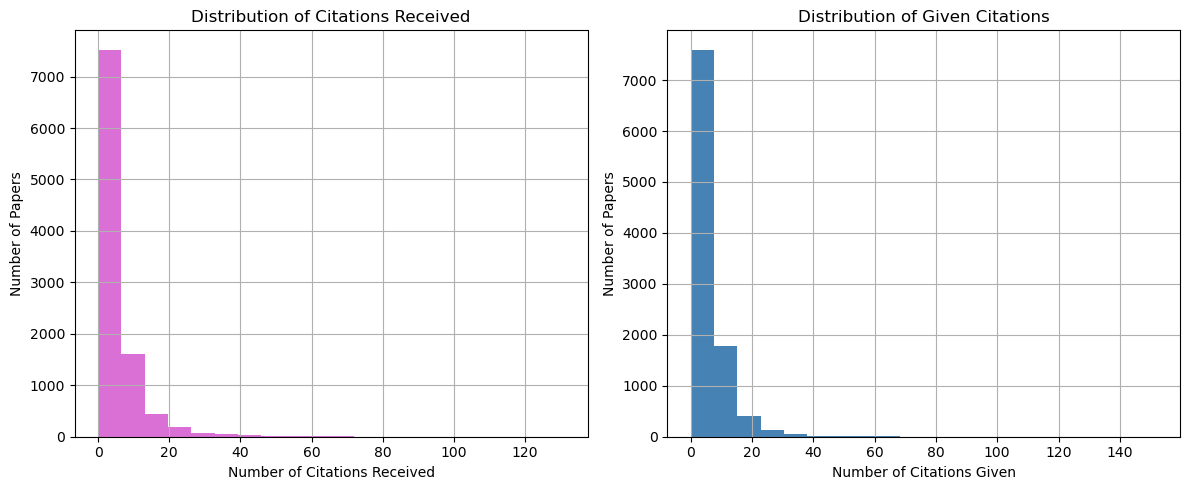

In [79]:
funct_1(citation_graph,"Citation Graph")

+-----------------+-----------------------+
|   Graph type:   |  Collaboration Graph  |
+-----------------+-----------------------+
| Number of Nodes |         21168         |
| Number of Edges |         135463        |
|     Density     | 0.0006046604297587972 |
|  Average Degree |   12.79884731670446   |
| Sparse or Dense |         Sparse        |
+-----------------+-----------------------+
+--------------+--------+
| Hubs (Top 5) | Degree |
+--------------+--------+
|  1973035492  |  346   |
|  332422508   |  325   |
|  2146468246  |  303   |
|  173839695   |  295   |
|  1976452423  |  283   |
+--------------+--------+


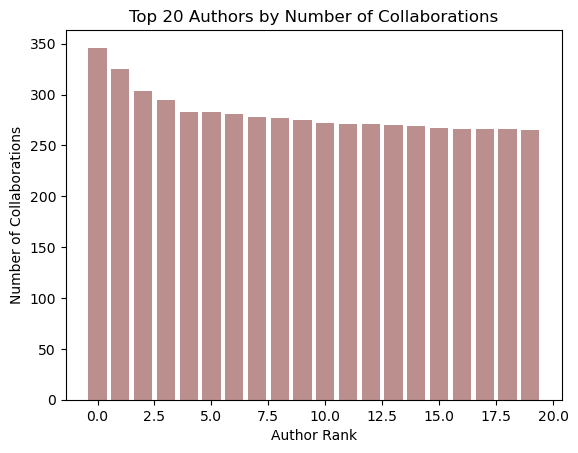

In [77]:
funct_1(collaboration_graph,"Collaboration Graph")